In [7]:
import data_prepare.misc as misc
import cv2
import numpy as np
import math
from concurrent.futures import ProcessPoolExecutor, as_completed, ThreadPoolExecutor

# name = "e_chi14N_1.png"
# img_gt = cv2.imread(f"E:/Dataset/amakano2/720p/{name}").astype(np.float32) / 255
# img = cv2.imread(f"E:/Dataset/amakano2/1080p/{name}")
# name = "hinata4794.png"
# img_gt = cv2.imread(f"R:/otome/_1_/{name}").astype(np.float32) / 255
# img = cv2.imread(f"R:/otome/_0_/{name}")
# img_gt = cv2.imread("R:/ginka/lr/o5bexpd1.png").astype(np.float32) / 255
# img = cv2.imread("R:/ginka/hr/8ovwuke5.png")
img_gt = cv2.imread("E:/Dataset/otome/_3_/kazari1619.png").astype(np.float32) / 255
img = cv2.imread("E:/Dataset/otome/_0_/kazari1619.png")
img = misc.resize(img, tuple(img_gt.shape[:2][::-1]), interpolation = misc.Filter.LANCZOS).astype(np.float32) / 255

def f(amount, threshold, radius = 3):
        out = misc.unsharp_mask_node(img, radius, amount, threshold)
        return math.log(1 - misc.calculate_ssim(out, img_gt))

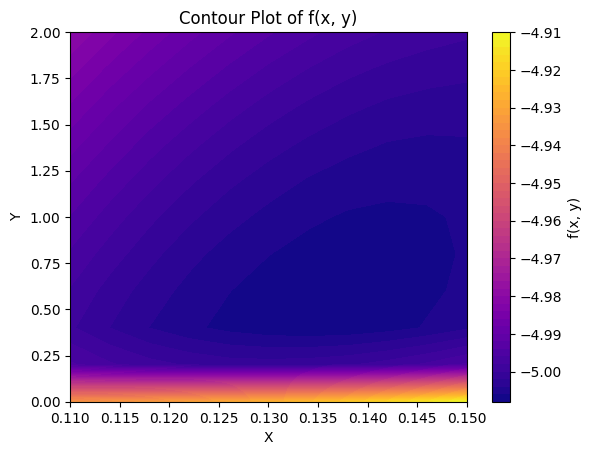

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor


# Generate x and y values
tick = 11
x_vals = np.linspace(0.0, 0.5, tick)
y_vals = np.linspace(0, 4, tick)
x_vals = np.linspace(0.11, 0.15, tick)
y_vals = np.linspace(0, 2.0, tick)

# Create an empty grid to store function values
z = np.zeros((len(x_vals), len(y_vals)))

# Define a function to evaluate f(x, y) in parallel
def evaluate_point(i, j):
    return i, j, f(x_vals[i], y_vals[j], 3)

# Evaluate the function at each point on the grid in parallel
with ThreadPoolExecutor() as executor:
    futures = []
    for i in range(len(x_vals)):
        for j in range(len(y_vals)):
            futures.append(executor.submit(evaluate_point, i, j))
    
    for future in futures:
        result = future.result()
        z[result[1], result[0]] = result[2]

# Create a 2D contour plot
X, Y = np.meshgrid(x_vals, y_vals)
plt.contourf(X, Y, z, 50, cmap='plasma')
plt.colorbar(label='f(x, y)')

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of f(x, y)')

# Show plot
plt.show()


In [14]:
#cv2 lanczos > -5
import os
for root, dir, files in os.walk("R:/ginka/lr_unique"):
    for name in files:
        hr = cv2.imread(f"R:/ginka/hr_unique/{name}")
        print(name)
        img_gt = cv2.imread(f"R:/ginka/lr_unique/{name}").astype(np.float32) / 255
        img = misc.resize(hr, tuple([int(i/2) for i in hr.shape[:2][::-1]]), interpolation = misc.Filter.LANCZOS).astype(np.float32) / 255
        # print(f(0.0929, 0.91))
        print(f(0.154, 0.5))
        # img = misc.resize(hr, (1280, 720), interpolation = misc.Filter.LANCZOS).astype(np.float32) / 255
        # print(f(0.0, 0.0))
        # img = misc.resize(hr, (1280, 720), interpolation = misc.Filter.CATROM).astype(np.float32) / 255
        # print(f(0.15, 0.9))
# img = misc.resize(hr, (1280, 720), interpolation = misc.Filter.GAUSS).astype(np.float32) / 255
# print(f(0.25, 1.1))

In [ ]:
# img_gt = cv2.imread("R:/ginka/lr/qdt353mw.png").astype(np.float32) / 255
# img = cv2.imread("R:/ginka/hr/c6btfh8t.png")
# img_gt = cv2.imread("R:/ginka/lr/o5bexpd1.png").astype(np.float32) / 255
# img = cv2.imread("R:/ginka/hr/8ovwuke5.png")
img_gt = cv2.imread("E:/Dataset/otome/_3_/kazari1619.png").astype(np.float32) / 255
img = cv2.imread("E:/Dataset/otome/_0_/kazari1619.png")
img = misc.resize(img, tuple(img_gt.shape[:2][::-1]), interpolation = misc.Filter.LANCZOS).astype(np.float32) / 255
# print(f(0.154, 0.5))
# print(f(0.21, 0.3))
# print(f(0, 0))
print(f(0.08, 0.25))
print(f(0.085, 1))
print(f(0.135, 0.5))
print(f(0.0, 0.0))

# img = misc.unsharp_mask_node(img, 0.154, 0.5, 3) * 255
# cv2.imwrite("R:/ia5rpyzl.png", img)

In [ ]:
# img_gt[100:,100:,:][:-100,:-100,:].shape
import os
import cv2 
import data_prepare.misc as misc
import numpy as np
import math
a = []
for root, dir, files in os.walk("E:/Dataset/otome/_0_/"):
    for name in files:
        hr = cv2.imread(f"E:/Dataset/otome/_0_/{name}")
        print(name)
        img_gt = cv2.imread(f"E:/Dataset/otome/_2_/{name}").astype(np.float32) / 255
        img = misc.resize(hr, tuple(img_gt.shape[:2][::-1]), interpolation = misc.Filter.LANCZOS).astype(np.float32) / 255
        # img_gt = img_gt[100:,100:,:][:-100,:-100,:]
        # img = img[100:,100:,:][:-100,:-100,:]
        # print(x := f(0.135, 0.5)) #-4.829732439887811
        # print(x := f(0.08, 0.25)) #-5.016775001423436
        # print(x := f(0.085, 1)) #-5.022420742871914
        print(x := math.log(1 - misc.calculate_ssim(img, img_gt)))
        a.append(x)
print(np.average(a))

In [ ]:
for root, dir, files in os.walk("R:/otome/0to3/"):
    for name in files:
        hr = cv2.imread(f"E:/Dataset/otome/_0_/{name}")
        print(name)
        img_down = cv2.imread(f"R:/otome/0to3/{name}").astype(np.float32) / 255
        img_gt = cv2.imread(f"E:/Dataset/otome/_3_//{name}").astype(np.float32) / 255
        print(math.log(1 - misc.calculate_ssim(img_down, img_gt)))


In [191]:
img = cv2.imread(f"R:/amakano/Output/0/StYuuh01a_0000i.png")
img = misc.resize(img, tuple([int(i*9/16) for i in img.shape[:2][::-1]]), interpolation = misc.Filter.LANCZOS).astype(np.float32) / 255
img = misc.unsharp_mask_node(img, 0.0929, 0.91, 3) * 255
img = misc.resize(img, tuple([int(i*11/16) for i in img.shape[:2][::-1]]), interpolation = misc.Filter.LANCZOS).astype(np.float32) / 255
img = misc.unsharp_mask_node(img, 0.0929, 0.91, 3) * 255
cv2.imwrite("R:/StYuuh01a_0000i.png", img)

True

In [1]:
import cv2
import data_prepare.misc as misc
name = "e_chi14N_1.png"
img = cv2.imread(f"E:/Dataset/amakano2/720p/{name}")
img = misc.ringing(img, (640, 360))
cv2.imwrite("R:/test.png", img)

True